# HW_09 by Andrew Lee

## Please create at least 2 well formatted exploratory visualizations for each of the following potential areas of analysis:
- Capacity planning: Data analysis can be used to analyze data on factors such as passenger demand, travel
patterns, and the availability of rolling stock (e.g. trains, cars, and locomotives). This can help Amtrak plan its
capacity more effectively and ensure that it has the right amount of capacity to meet demand.
- Asset management: Data analysis can be used to analyze data on the performance and maintenance of
Amtrak's assets, such as its rolling stock and infrastructure. This can help Amtrak optimize the maintenance
and repair of its assets, reduce downtime, and improve the overall performance of its operations.
- Customer experience: Data analysis can be used to analyze data on customer satisfaction, such as survey
results and feedback, to identify areas for improvement in the customer experience. This can help Amtrak tailor
its services to better meet the needs and preferences of its customers.

### Import Data

In [1]:
# import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('./dataset/datasets_applied_business_analytics - amtrak.csv.csv')
# drop all rows with null data
df = df[df['Population'].notna()]
df.head()

,Code,StationName,Staffed,StationType,City,State,Zip,Country,Division,PublicPhone,...,GroupCity,IATACode,IATAName,NonAmtrakTicketSale,TimeZone,ObserveDayLightSaving,CheckInWService,CheckInWOService,Elevation,Population
1,ABE,"Aberdeen, Maryland",N,Station Building (with waiting room),Aberdeen,MD,21001-3701,United States,Mid-Atlantic,800-USA-RAIL,...,NaN,NaN,NaN,NaN,E,Y,30.0,30.0,90.0,18000.0
2,ABN,"Absecon, New Jersey",N,Platform with Shelter,Absecon,NJ,08201,United States,Northeast,973-275-5555,...,NaN,NaN,NaN,NaN,E,Y,30.0,30.0,20.0,8065.0
3,ABQ,"Albuquerque, New Mexico",Y,Station Building (with waiting room),Albuquerque,NM,87102-3405,United States,Southwest,505-842-9650,...,NaN,NaN,NaN,Via Rail Canada,M,Y,60.0,30.0,4959.0,450000.0
4,ACA,"Antioch-Pittsburg, California",N,Platform with Shelter,Antioch,CA,94509-1122,United States,Pacific,000-000-0000,...,NaN,NaN,NaN,NaN,P,Y,30.0,30.0,14.0,100586.0
5,ACY,"Atlantic City, New Jersey",N,Station Building (with waiting room),Atlantic City,NJ,08401-4106,United States,Northeast,973-491-9400,...,NaN,NaN,NaN,New Jersey Transit,E,Y,30.0,30.0,7.0,37000.0


### Capacity planning

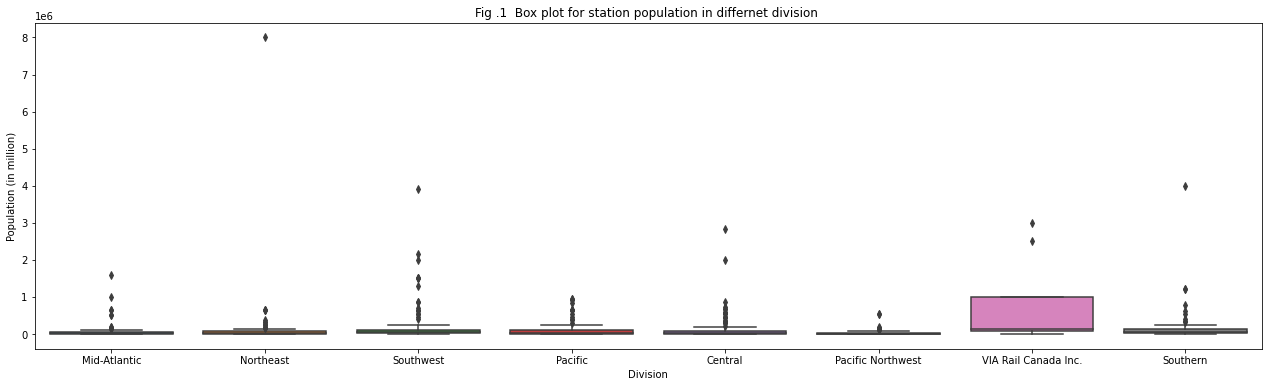

In [18]:
plt.figure(figsize=(22,6))
sns.boxplot(x = df['Division'],
            y = df['Population'])
plt.xlabel('Division')
plt.ylabel('Population (in million)')
plt.title('Fig .1  Box plot for station population in differnet division ')
plt.show()

In Fig. 1, We can see VIA Rail Candada Inc. box have higher average populations than other division. However, we can see the highest outlier is in Northeast and there are mulitiple outliers in Southwest. From here, we can say VIA Rail Candada Inc. stations are better on spearding the capacity for each station comparing to other divsion. Other divisions should focus on the outliers stations and decrease the high capacity for the outlier stations, espically Northeast (sicne there is a station have the highest population).

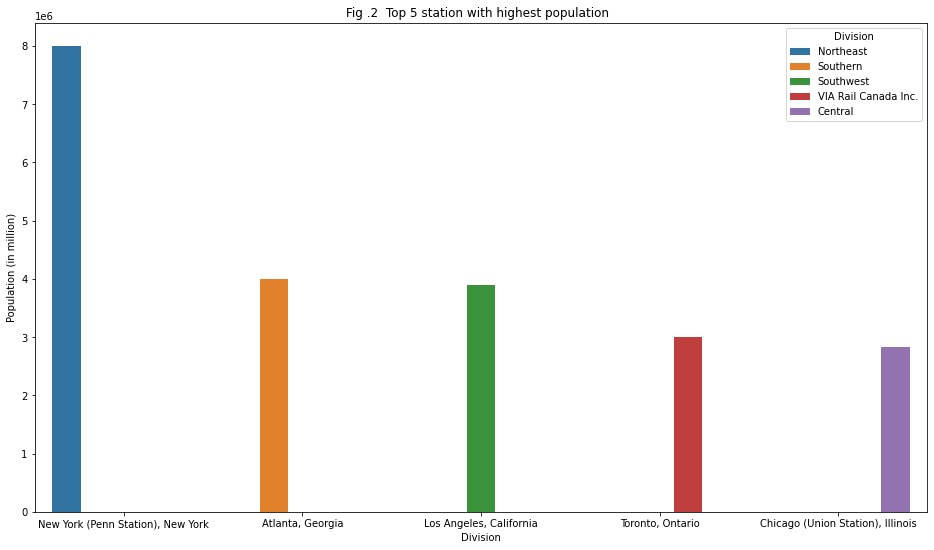

In [41]:
df2=df.sort_values(by="Population",ascending=False).head(5)
plt.figure(figsize=(16,9))
sns.barplot(x = df2['StationName'],
            y = df2['Population'],
            hue=df2["Division"])
plt.xlabel('Division')
plt.ylabel('Population (in million)')
plt.title('Fig .2  Top 5 station with highest population  ')
plt.show()

From Fig. 2, we found out New York(Penn station) is the highest population state in Northeast and its population is twice time than the second highest population station. The station population is over-concentration.This show we should focus resourses on supporting New York(Penn station), such as building second station in New York to reduce the over-concentration on one station.

### Asset management

Text(0.5, 1.0, 'MetrolinkTVM_perc')

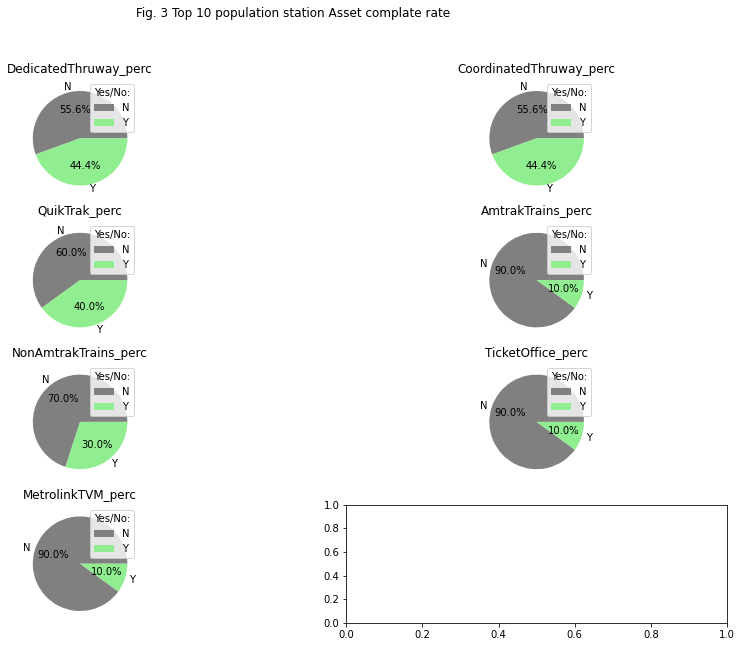

In [50]:
# shows Top 10 Station Asset complete rate
df2 = df.sort_values("Population",ascending=False).head(10)
df2['DedicatedThruway_Y'] = df2.DedicatedThruway.map({'N':0, 'Y':1})
df2['CoordinatedThruway_Y'] = df2.CoordinatedThruway.map({'N':0, 'Y':1})
df2['QuikTrak_Y'] = df2.QuikTrak.map({'N':0, 'Y':1})
df2['AmtrakTrains_Y'] = df2.AmtrakTrains.map({'N':0, 'Y':1})
df2['Non-AmtrakTrains_Y'] = df2["Non-AmtrakTrains"].map({'N':0, 'Y':1})
df2['TicketOffice_Y'] = df2.TicketOffice.map({'N':0, 'Y':1})
df2['MetrolinkTVM_Y'] = df2.MetrolinkTVM.map({'N':0, 'Y':1})

DedicatedThruway_perc= df2['DedicatedThruway_Y'].value_counts(normalize=True)*100
CoordinatedThruway_perc= df2['CoordinatedThruway_Y'].value_counts(normalize=True)*100
QuikTrak_perc= df2['QuikTrak_Y'].value_counts(normalize=True)*100
AmtrakTrains_perc= df2['AmtrakTrains_Y'].value_counts(normalize=True)*100
NonAmtrakTrains_perc= df2['Non-AmtrakTrains_Y'].value_counts(normalize=True)*100
TicketOffice_perc= df2['TicketOffice_Y'].value_counts(normalize=True)*100
MetrolinkTVM_perc= df2['MetrolinkTVM_Y'].value_counts(normalize=True)*100

fig, axs = plt.subplots(4, 2,figsize=(15,10))
fig.suptitle('Fig. 3 Top 10 population station Asset complate rate ')
axs[0, 0].pie(DedicatedThruway_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0, 0].legend(title = "Yes/No:")
axs[0, 0].set_title("DedicatedThruway_perc")

axs[0, 1].pie(CoordinatedThruway_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0, 1].legend(title = "Yes/No:")
axs[0, 1].set_title("CoordinatedThruway_perc")

axs[1, 0].pie(QuikTrak_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1, 0].legend(title = "Yes/No:")
axs[1, 0].set_title("QuikTrak_perc")

axs[1, 1].pie(AmtrakTrains_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1, 1].legend(title = "Yes/No:")
axs[1, 1].set_title("AmtrakTrains_perc")

axs[2, 0].pie(NonAmtrakTrains_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2, 0].legend(title = "Yes/No:")
axs[2, 0].set_title("NonAmtrakTrains_perc")

axs[2, 1].pie(TicketOffice_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2, 1].legend(title = "Yes/No:")
axs[2, 1].set_title("TicketOffice_perc")

axs[3, 0].pie(MetrolinkTVM_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[3, 0].legend(title = "Yes/No:")
axs[3, 0].set_title("MetrolinkTVM_perc")

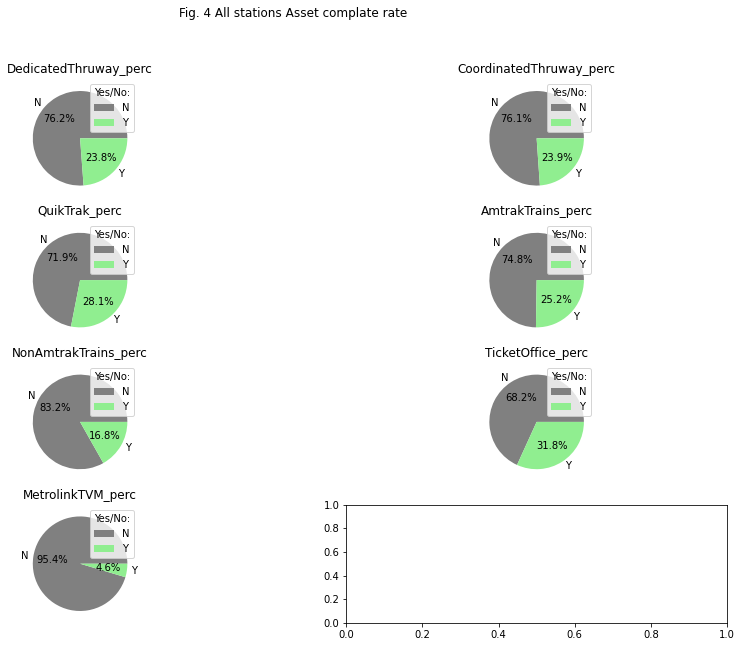

In [51]:
df['DedicatedThruway_Y'] = df.DedicatedThruway.map({'N':0, 'Y':1})
df['CoordinatedThruway_Y'] = df.CoordinatedThruway.map({'N':0, 'Y':1})
df['QuikTrak_Y'] = df.QuikTrak.map({'N':0, 'Y':1})
df['AmtrakTrains_Y'] = df.AmtrakTrains.map({'N':0, 'Y':1})
df['Non-AmtrakTrains_Y'] = df["Non-AmtrakTrains"].map({'N':0, 'Y':1})
df['TicketOffice_Y'] = df.TicketOffice.map({'N':0, 'Y':1})
df['MetrolinkTVM_Y'] = df.MetrolinkTVM.map({'N':0, 'Y':1})

DedicatedThruway_perc= df['DedicatedThruway_Y'].value_counts(normalize=True)*100
CoordinatedThruway_perc= df['CoordinatedThruway_Y'].value_counts(normalize=True)*100
QuikTrak_perc= df['QuikTrak_Y'].value_counts(normalize=True)*100
AmtrakTrains_perc= df['AmtrakTrains_Y'].value_counts(normalize=True)*100
NonAmtrakTrains_perc= df['Non-AmtrakTrains_Y'].value_counts(normalize=True)*100
TicketOffice_perc= df['TicketOffice_Y'].value_counts(normalize=True)*100
MetrolinkTVM_perc= df['MetrolinkTVM_Y'].value_counts(normalize=True)*100

fig, axs = plt.subplots(4, 2,figsize=(15,10))
fig.suptitle('Fig. 4 All stations Asset complate rate ')
axs[0, 0].pie(DedicatedThruway_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0, 0].legend(title = "Yes/No:")
axs[0, 0].set_title("DedicatedThruway_perc")

axs[0, 1].pie(CoordinatedThruway_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0, 1].legend(title = "Yes/No:")
axs[0, 1].set_title("CoordinatedThruway_perc")

axs[1, 0].pie(QuikTrak_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1, 0].legend(title = "Yes/No:")
axs[1, 0].set_title("QuikTrak_perc")

axs[1, 1].pie(AmtrakTrains_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1, 1].legend(title = "Yes/No:")
axs[1, 1].set_title("AmtrakTrains_perc")

axs[2, 0].pie(NonAmtrakTrains_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2, 0].legend(title = "Yes/No:")
axs[2, 0].set_title("NonAmtrakTrains_perc")

axs[2, 1].pie(TicketOffice_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2, 1].legend(title = "Yes/No:")
axs[2, 1].set_title("TicketOffice_perc")

axs[3, 0].pie(MetrolinkTVM_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[3, 0].legend(title = "Yes/No:")
axs[3, 0].set_title("MetrolinkTVM_perc")

plt.show() 

In Fig. 3, it shows the top 10 population station Asset complate rate. DedicatedThruway,CoordinatedThruway, and QuickTrak completed rate are close to 50%. In Fig 4, we can see all station asset complete rate is less than 30%. DedicatedThruway,CoordinatedThruway, and QuickTrak asset features seems to have potential to improve the population of the station. The company should create survey and go deeper for researching the relationship between population and those features. In otherside, MetrolinkTVM feature have the lowest complete rate either on Fig 3 and Fig 4. MetrolinkTVM feature may be outdated or needed for most traveler. The company should also create a survey and collect public opinion on MetrolinkTVM to decide should we keep MetrolinkTVM feature.

### Customer experience

Text(0.5, 1.0, 'Lounge_perc')

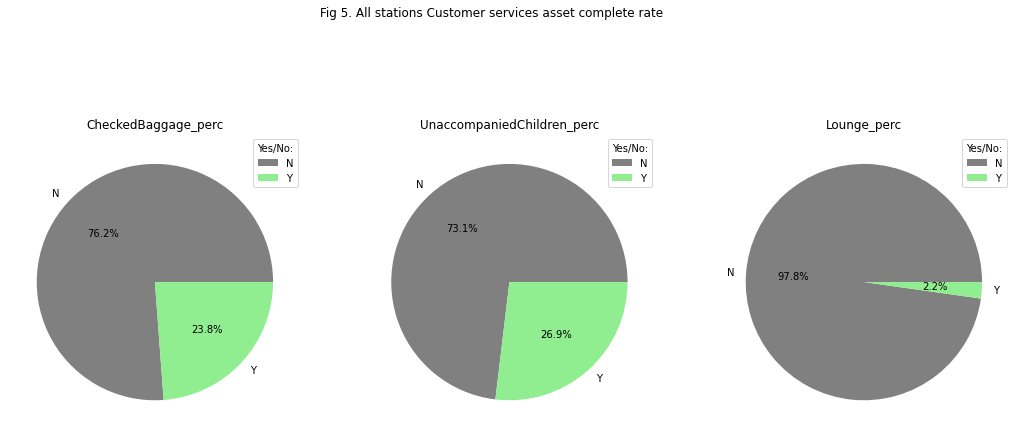

In [52]:
df['CheckedBaggage_Y'] = df.DedicatedThruway.map({'N':0, 'Y':1})
df['UnaccompaniedChildren_Y'] = df.UnaccompaniedChildren.map({'N':0, 'Y':1})
df['Lounge_Y'] = df.Lounge.map({'N':0, 'Y':1})


CheckedBaggage_perc= df['CheckedBaggage_Y'].value_counts(normalize=True)*100
UnaccompaniedChildren_perc= df['UnaccompaniedChildren_Y'].value_counts(normalize=True)*100
Lounge_perc= df['Lounge_Y'].value_counts(normalize=True)*100

fig, axs = plt.subplots(1, 3,figsize=(18,8))
fig.suptitle('Fig 5. All stations Customer services asset complete rate ')
axs[0].pie(CheckedBaggage_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0].legend(title = "Yes/No:")
axs[0].set_title("CheckedBaggage_perc")

axs[1].pie(UnaccompaniedChildren_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1].legend(title = "Yes/No:")
axs[1].set_title("UnaccompaniedChildren_perc")

axs[2].pie(Lounge_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2].legend(title = "Yes/No:")
axs[2].set_title("Lounge_perc")


Text(0.5, 1.0, 'Lounge_Y')

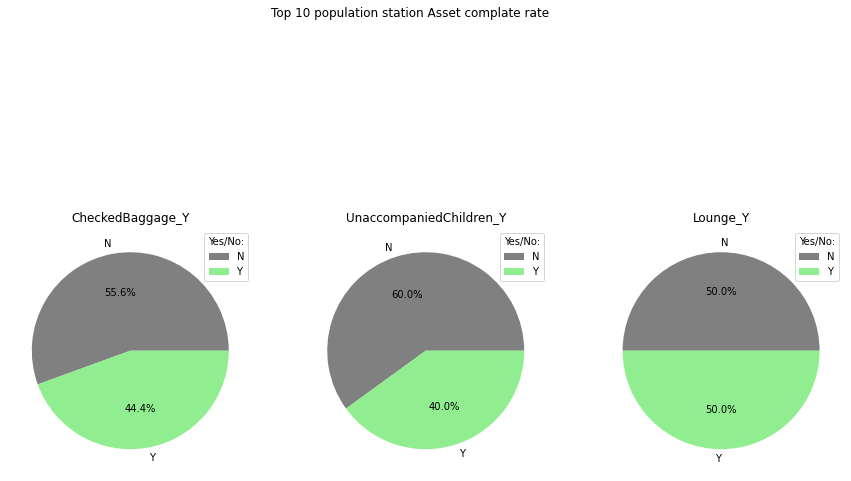

In [49]:
# shows Top 10 Station Asset complete rate
df2 = df.sort_values("Population",ascending=False).head(10)
df2['CheckedBaggage_Y'] = df2.DedicatedThruway.map({'N':0, 'Y':1})
df2['UnaccompaniedChildren_Y'] = df2.UnaccompaniedChildren.map({'N':0, 'Y':1})
df2['Lounge_Y'] = df2.Lounge.map({'N':0, 'Y':1})


CheckedBaggage_perc= df2['CheckedBaggage_Y'].value_counts(normalize=True)*100
UnaccompaniedChildren_perc= df2['UnaccompaniedChildren_Y'].value_counts(normalize=True)*100
Lounge_perc= df2['Lounge_Y'].value_counts(normalize=True)*100

fig, axs = plt.subplots(1, 3,figsize=(15,10))
fig.suptitle('Fig 6.Top 10 population station customer services Asset complate rate ')
axs[0].pie(CheckedBaggage_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[0].legend(title = "Yes/No:")
axs[0].set_title("CheckedBaggage_Y")

axs[1].pie(UnaccompaniedChildren_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[1].legend(title = "Yes/No:")
axs[1].set_title("UnaccompaniedChildren_Y")

axs[2].pie(Lounge_perc, labels = ["N","Y"], autopct='%1.1f%%',colors=['gray', 'lightgreen'])
axs[2].legend(title = "Yes/No:")
axs[2].set_title("Lounge_Y")

In [58]:
from statsmodels.formula.api import ols
model1 = ols('Population ~ CheckedBaggage_Y', data=df).fit()

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in Population by CheckedBaggage.")
else:
    print("There is no significant difference between the means in Population by CheckedBaggage.")
#######################
model1 = ols('Population ~ UnaccompaniedChildren_Y', data=df).fit()

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in Population by UnaccompaniedChildren.")
else:
    print("There is no significant difference between the means in Population by UnaccompaniedChildren.")
#######################
model1 = ols('Population ~ Lounge_Y', data=df).fit()

anova_table = sm.stats.anova_lm(model1, typ=2)
print(anova_table)
print()
pv = anova_table['PR(>F)'][0]
print('p-value:',pv)
if pv < 0.05:
    print("There is a significant difference between the means in Population by Lounge.")
else:
    print("There is no significant difference between the means in Population by Lounge.")

                        sum_sq     df         F    PR(>F)
CheckedBaggage_Y  5.972810e+11    1.0  2.670276  0.102717
Residual          1.469562e+14  657.0       NaN       NaN

p-value: 0.10271731352884593
There is no significant difference between the means in Population by CheckedBaggage.
                               sum_sq     df          F        PR(>F)
UnaccompaniedChildren_Y  6.844301e+12    1.0  31.231589  3.331966e-08
Residual                 1.470475e+14  671.0        NaN           NaN

p-value: 3.3319658904321485e-08
There is a significant difference between the means in Population by UnaccompaniedChildren.
                sum_sq     df           F        PR(>F)
Lounge_Y  2.872881e+13    1.0  154.015439  5.526847e-32
Residual  1.251630e+14  671.0         NaN           NaN

p-value: 5.526847416599772e-32
There is a significant difference between the means in Population by Lounge.


In fig.6 and fig. 5, we find out the top 10 station customer services asset complete rate is around 50%. However, all station customer services asset complete rate is less than 30%. It seems CheckedBaggage, UnaccompaniedChildren ,and Lounge feature help the stations help the population of the station. Using ANOVA test, we found out there is significant difference between UnaccompaniedChildren or Lounage feature.
The company should create a survey too collection more information about public opinion on UnaccompaniedChildren and Lounage features.